In [1]:
### Importing Basic libraries
import pandas as pd
import numpy as np
import warnings
import itertools
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
### Reading dataset
plastic = pd.read_csv(r'C:/Users/rayad/OneDrive/Documents/DataScience_Assignments/Forecast/PlasticSales.csv', header =0, index_col=0, parse_dates=True)
plastic

,Sales
Month,
2049-01-01,742
2049-02-01,697
2049-03-01,776
2049-04-01,898
2049-05-01,1030
2049-06-01,1107
2049-07-01,1165
2049-08-01,1216
2049-09-01,1208


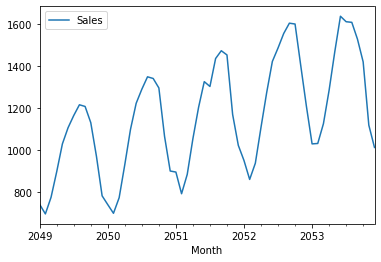

In [3]:
plastic.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD34DF1910>]],
      dtype=object)

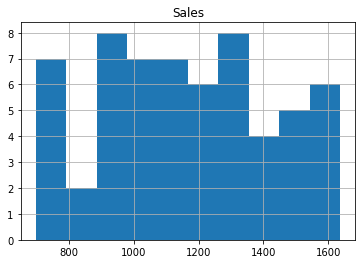

In [4]:
plastic.hist()

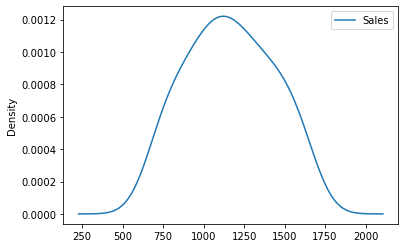

In [5]:
plastic.plot(kind='kde')

In [15]:
### Splitting Data
split_point = len(plastic) - 10
dataset, validation = plastic[0:split_point], plastic[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 50, Validation 10


#### Building Naive Model

In [17]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train_size
train, test = X[0:train_size], X[train_size:]

In [18]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.2f, Expected=%.2f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=896.00, Expected=793.00
>Predicted=793.00, Expected=885.00
>Predicted=885.00, Expected=1055.00
>Predicted=1055.00, Expected=1204.00
>Predicted=1204.00, Expected=1326.00
>Predicted=1326.00, Expected=1303.00
>Predicted=1303.00, Expected=1436.00
>Predicted=1436.00, Expected=1473.00
>Predicted=1473.00, Expected=1453.00
>Predicted=1453.00, Expected=1170.00
>Predicted=1170.00, Expected=1023.00
>Predicted=1023.00, Expected=951.00
>Predicted=951.00, Expected=861.00
>Predicted=861.00, Expected=938.00
>Predicted=938.00, Expected=1109.00
>Predicted=1109.00, Expected=1274.00
>Predicted=1274.00, Expected=1422.00
>Predicted=1422.00, Expected=1486.00
>Predicted=1486.00, Expected=1555.00
>Predicted=1555.00, Expected=1604.00
>Predicted=1604.00, Expected=1600.00
>Predicted=1600.00, Expected=1403.00
>Predicted=1403.00, Expected=1209.00
>Predicted=1209.00, Expected=1030.00
>Predicted=1030.00, Expected=1032.00
RMSE: 130.244


In [19]:
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [20]:
# Gridsearch method to find out best p, d, q values.
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [21]:
# load trian dataset
train = read_csv('Train_data.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=287.826
ARIMA(0, 0, 1) RMSE=173.349
ARIMA(0, 1, 0) RMSE=131.965
ARIMA(0, 1, 1) RMSE=115.456
ARIMA(0, 1, 2) RMSE=124.381
ARIMA(0, 1, 3) RMSE=117.369
ARIMA(0, 2, 0) RMSE=115.573
ARIMA(0, 2, 1) RMSE=120.601
ARIMA(0, 2, 2) RMSE=126.179
ARIMA(0, 2, 3) RMSE=126.092
ARIMA(0, 2, 4) RMSE=124.122
ARIMA(1, 0, 0) RMSE=131.068
ARIMA(1, 0, 1) RMSE=113.286
ARIMA(1, 0, 2) RMSE=120.403
ARIMA(1, 1, 0) RMSE=104.850
ARIMA(1, 2, 0) RMSE=120.745
ARIMA(1, 2, 1) RMSE=116.965
ARIMA(1, 2, 2) RMSE=121.632
ARIMA(2, 0, 0) RMSE=95.366
ARIMA(2, 0, 1) RMSE=95.921
ARIMA(2, 1, 0) RMSE=110.318
ARIMA(2, 2, 0) RMSE=124.531
ARIMA(2, 2, 1) RMSE=122.992
ARIMA(3, 1, 0) RMSE=108.382
ARIMA(3, 2, 0) RMSE=129.020
ARIMA(3, 2, 1) RMSE=120.365
ARIMA(4, 1, 0) RMSE=104.839
ARIMA(4, 2, 0) RMSE=133.007
ARIMA(4, 2, 1) RMSE=120.828
Best ARIMA(2, 0, 0) RMSE=95.366


In [22]:
# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

[]

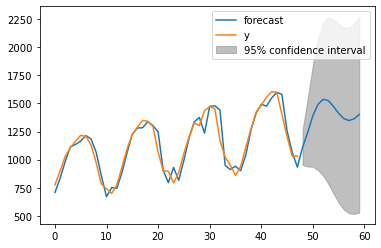

In [23]:
# fit model
model = ARIMA(X, order=(4,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 60)
plt.plot()

In [24]:
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

147.4376501898685

#### Final Model Building by combining both train and test data

In [25]:
# fit model
data = read_csv(r'C:/Users/rayad/OneDrive/Documents/DataScience_Assignments/Forecast/PlasticSales.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = data.values
X = X.astype('float32')

In [26]:
model = ARIMA(X, order=(4,1,0))
model_fit = model.fit()

#### Forecasting for next 12 Months

[]

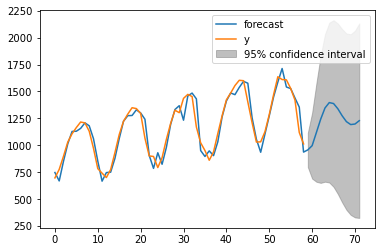

In [29]:
forecast=model_fit.forecast(steps=12)[0]
model_fit.plot_predict(1,72)
plt.plot()

In [30]:
forecast

array([ 957.20460344,  996.21317534, 1119.17446393, 1243.05023792,
       1346.56099178, 1396.69317863, 1387.87218925, 1339.42556447,
       1274.45568829, 1219.65200396, 1192.48431341, 1197.54848403])